In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv(r"D:\Resume_Projects\Clustering\Notebook\marketing_campaign.csv", sep='\t')

In [7]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Analyzing the data 

In [8]:
df.shape

(2240, 29)

In [9]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [10]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [12]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [13]:
def plot_missing_percentage(df):
    # Calculate the percentage of missing values for each column
    missing_percentage = (df.isnull().sum() / len(df)) * 100

    # Set up the plot
    plt.figure(figsize=(12, 8))
    ax = plt.gca()

    # Create a bar plot of the missing percentage
    missing_percentage.plot(kind='bar', ax=ax, color='steelblue')

    # Set the labels and title
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('Percentage of Missing Values', fontsize=12)
    plt.title('Percentage of Missing Values in Each Column', fontsize=14)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Add percentage values above the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    # Remove the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Show the plot
    plt.tight_layout()
    plt.show()

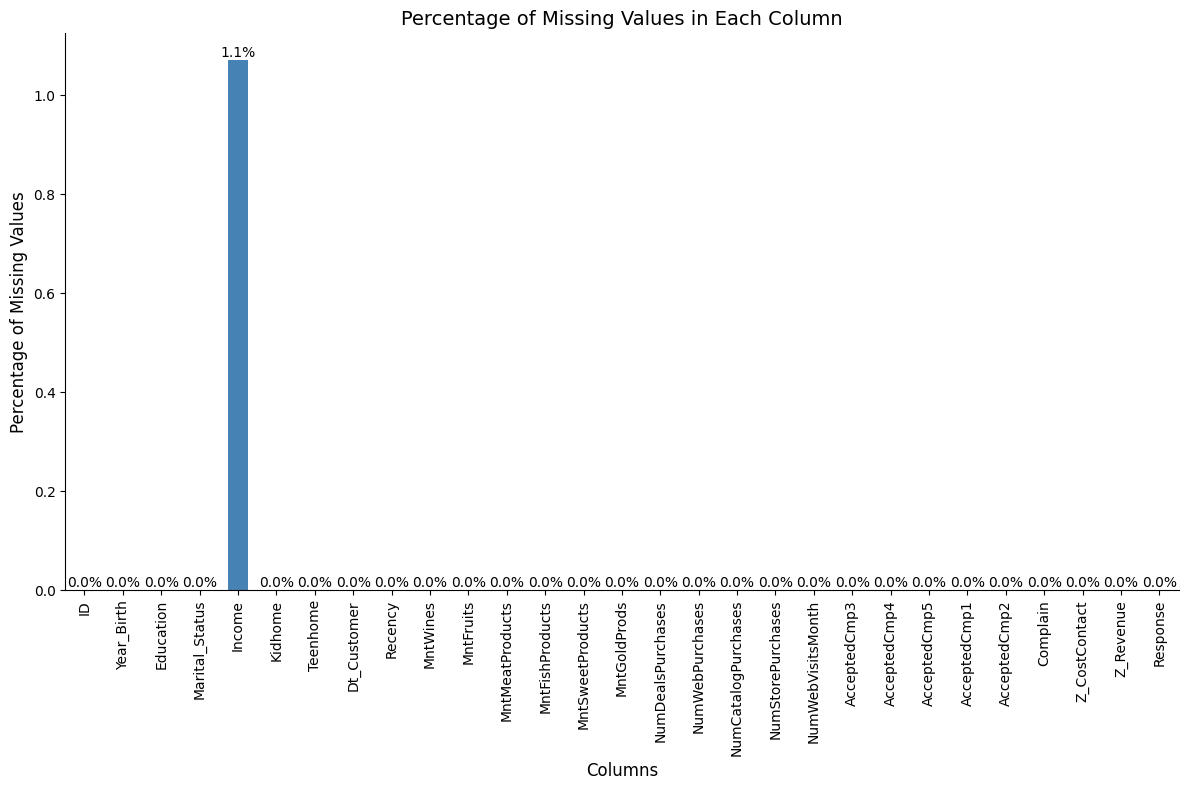

In [14]:
plot_missing_percentage(df)

In [15]:
df.dropna(inplace=True
)

In [16]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Fucntions

Unique Values in Dtaaframe

In [17]:
def plot_unique_values(df):
    unique_counts = df.nunique()
    total_counts = df.shape[0]

    percentages = (unique_counts / total_counts) * 100

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=percentages.index, y=percentages.values, palette='Oranges')
    ax.set_xlabel('Columns', fontsize=12)
    ax.set_ylabel('Percentage of Unique Values', fontsize=12)
    ax.set_title('Percentage of Unique Values in Each Column', fontsize=14)
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    plt.show()
    
def count_unique_values(df):
    unique_counts = df.nunique()
    return unique_counts

Unique values in column

In [18]:
def plot_unique_values_column(df, column_label):
    unique_counts = df[column_label].value_counts().sort_index()
    total_count = unique_counts.sum()
    percentages = (unique_counts / total_count) * 100

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=unique_counts.index, y=unique_counts.values, palette='Blues')
    ax.set_xlabel(column_label, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_title(f"Unique Values in '{column_label}'", fontsize=14)
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Add percentage labels
    for i, count in enumerate(unique_counts):
        percentage = percentages[i]
        ax.text(i, count + 1, f"{percentage:.2f}%", ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()

Hisplot of columns

In [19]:
def plot_histogram(df, column_name):
    plt.figure(figsize=(10, 6))
    plt.hist(df[column_name], bins=30, edgecolor='k', color='lightblue')
    plt.title(f"Histogram of '{column_name}' Column", fontsize=14)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Plot Discerete Date

In [20]:
def plot_discrete_data(df, column_name):
    value_counts = df[column_name].value_counts().sort_index()
    total_count = value_counts.sum()
    percentages = (value_counts / total_count) * 100

    plt.figure(figsize=(10, 6))
    plt.bar(value_counts.index, value_counts.values, color='lightblue', edgecolor='k')
    plt.title(f"Bar Plot for '{column_name}' Column", fontsize=14)
    plt.xlabel('Values', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add percentage labels
    for i, count in enumerate(value_counts):
        percentage = percentages[i]
        plt.text(value_counts.index[i], count + 0.5, f"{percentage:.2f}%", ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()

Box plot

In [21]:
def box_plot_with_outliers(df):
    sns.set(style="whitegrid")  # Set seaborn style

    fig, ax = plt.subplots(figsize=(10, 6))  # Set figure size
    sns.boxplot(data=df, ax=ax, sym='o', whis=1.5)  # Create box plot

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
    ax.set_xlabel('Columns')  # Set x-axis label
    ax.set_ylabel('Values')  # Set y-axis label
    ax.set_title('Box Plot with Outliers')  # Set plot title

    sns.despine()  # Remove top and right spines

    plt.tight_layout()  # Adjust layout spacing
    plt.show()

In [22]:

def box_plot_with_outliers_column(df, column_labels):
    sns.set(style="whitegrid")  # Set seaborn style

    fig, ax = plt.subplots(figsize=(10, 6))  # Set figure size
    sns.boxplot(data=df, ax=ax, sym='o', whis=1.5)  # Create box plot

    ax.set_xticklabels(column_labels, rotation=45, ha='right')  # Rotate x-axis labels
    ax.set_xlabel('Columns')  # Set x-axis label
    ax.set_ylabel('Values')  # Set y-axis label
    ax.set_title('Box Plot with Outliers')  # Set plot title

    sns.despine()  # Remove top and right spines

    plt.tight_layout()  # Adjust layout spacing
    plt.show()

# People 

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

In [23]:
people_df=df[['ID','Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','Dt_Customer','Recency','Complain']]

In [24]:
people_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,0


In [25]:
people_df.dtypes

ID                  int64
Year_Birth          int64
Education          object
Marital_Status     object
Income            float64
Kidhome             int64
Teenhome            int64
Dt_Customer        object
Recency             int64
Complain            int64
dtype: object

#### Unique Values

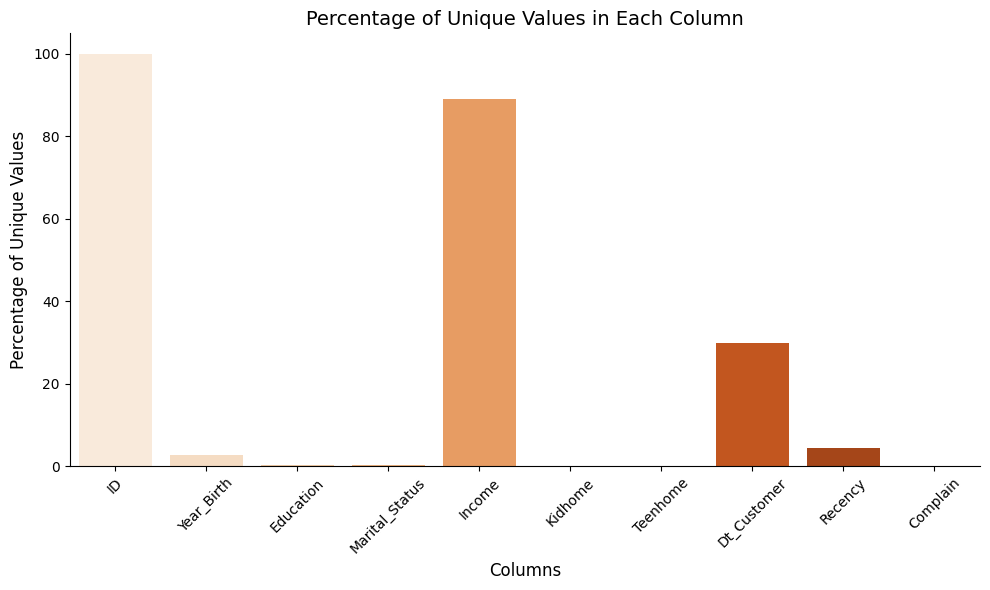

In [26]:
plot_unique_values(people_df)

In [27]:
unique_values = count_unique_values(people_df)
print(unique_values)


ID                2216
Year_Birth          59
Education            5
Marital_Status       8
Income            1974
Kidhome              3
Teenhome             3
Dt_Customer        662
Recency            100
Complain             2
dtype: int64


Offspring

In [28]:
people_df['Total_Offsprings']=people_df['Kidhome']+people_df['Teenhome']

In [88]:
people_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,Total_Offsprings
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,0,2
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,0,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,0,1
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,0,3
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,0,1


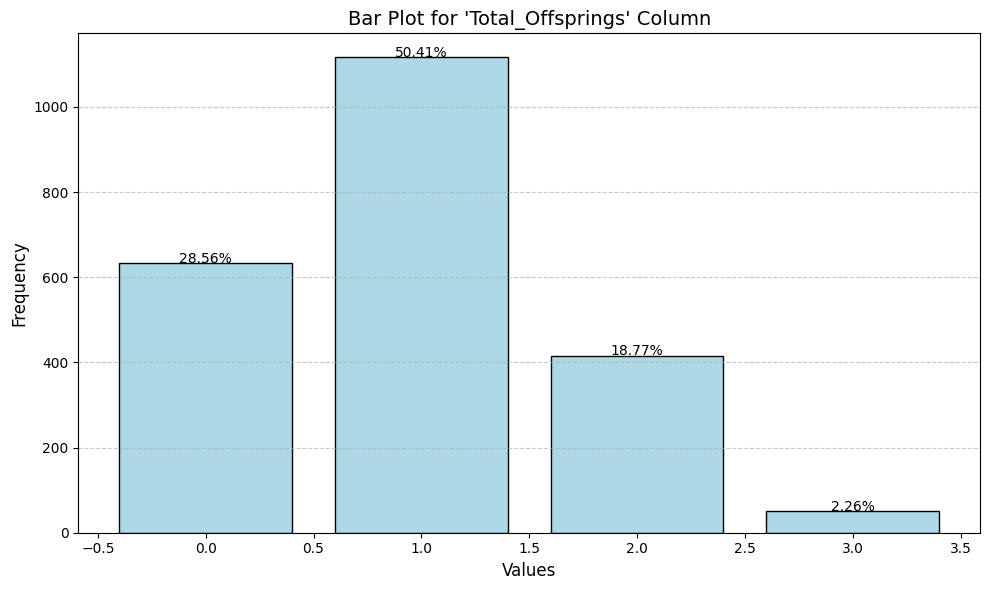

In [29]:
plot_discrete_data(people_df,'Total_Offsprings')

Marital Status

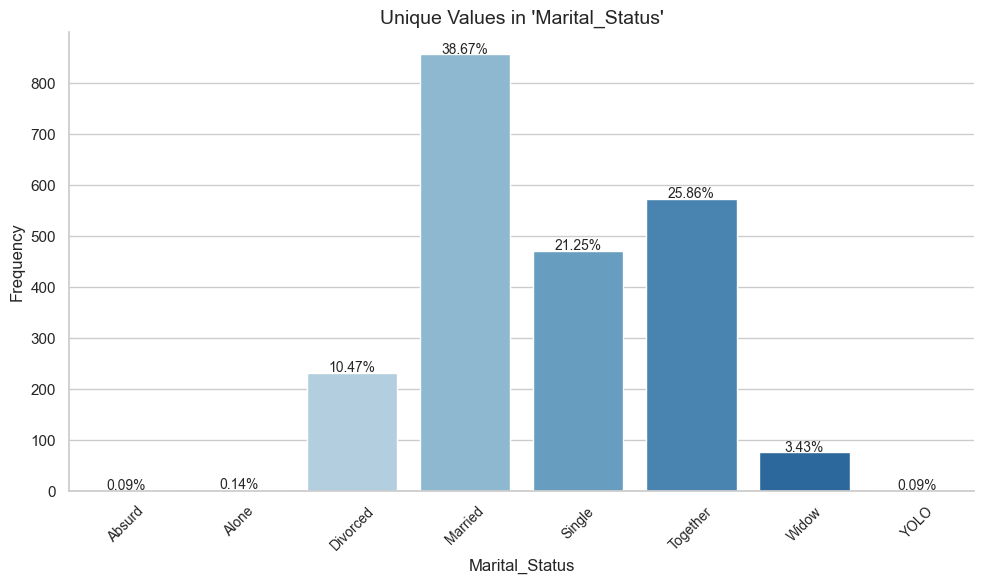

In [90]:
plot_unique_values_column(people_df,'Marital_Status')

In [91]:
# Deriving Living attributes based on the marital status
people_df['Living_With'] = people_df['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Single':'Alone', 'Divorced':'Alone',
                                                'Widow':'Alone', 'Absurd':'Alone', 'YOLO':'Alone'})

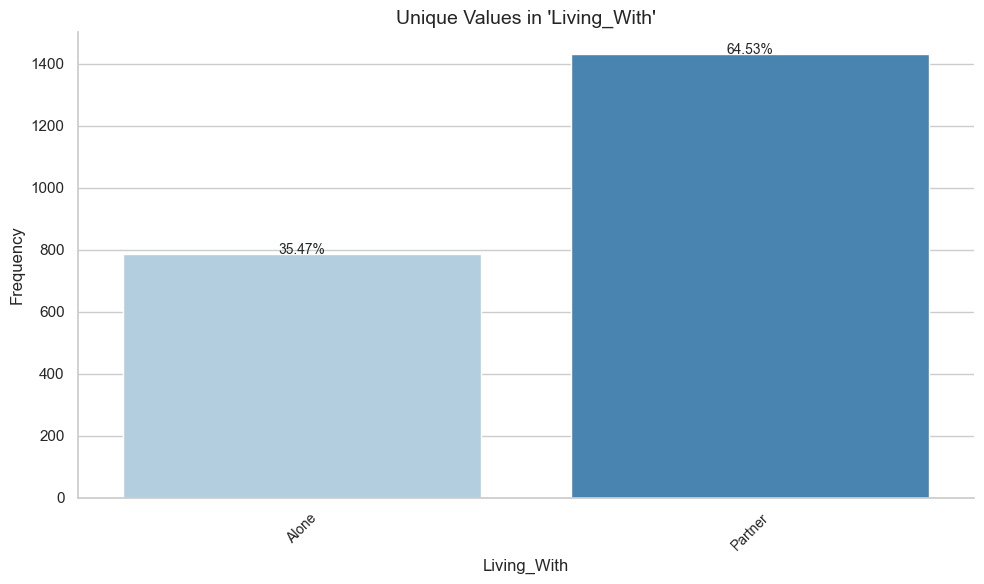

In [92]:
plot_unique_values_column(people_df,'Living_With')

In [93]:
# Feature indicating Family size
people_df['Family_Size']=people_df['Living_With'].replace({'Partner':2,'Alone':1}) + people_df['Total_Offsprings']


In [94]:
people_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,Total_Offsprings,Living_With,Family_Size
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,0,0,Alone,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,0,2,Alone,3
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,0,0,Partner,2
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,0,1,Partner,3
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,0,1,Partner,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,0,1,Partner,3
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,0,3,Partner,5
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,0,0,Alone,1
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,0,1,Partner,3


Income

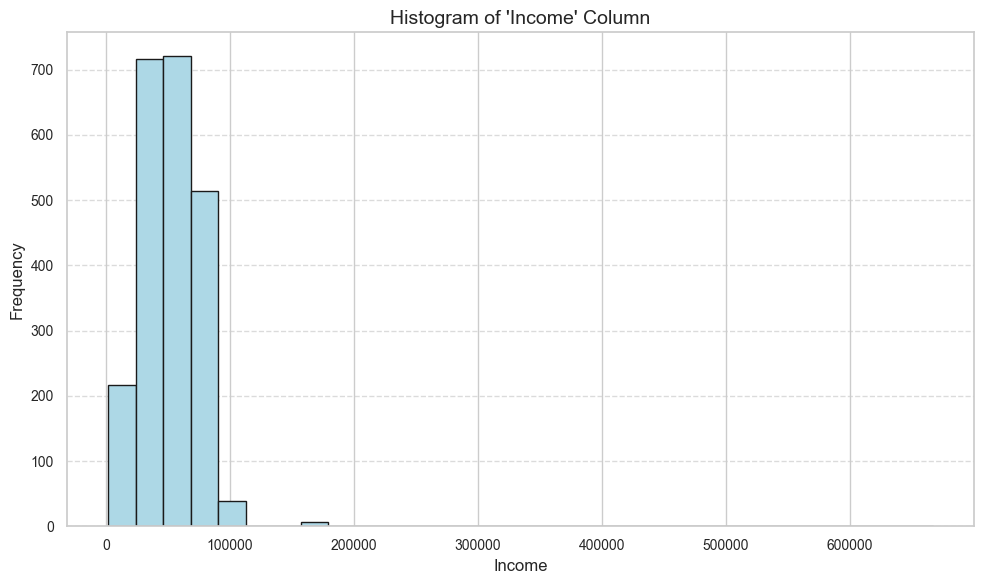

In [95]:
plot_histogram(people_df,'Income')

Some outliers can be seen in Income 

Complain

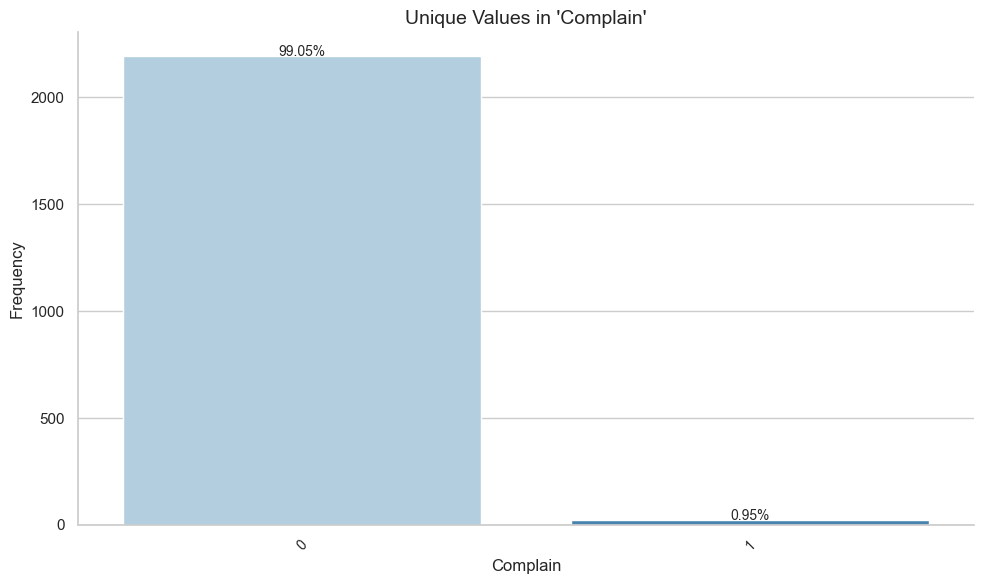

In [96]:
plot_unique_values_column(people_df,'Complain')

1. Around 1% users have registered complaints

Education

In [97]:
#Segment education levels in three groups
people_df['Education'] = people_df['Education'].replace({'Basic' : 'Undergrade', 
                                           '2n Cycle' : 'Undergrade', 
                                           'Graduation' : 'Graduate', 
                                           'Master' : 'Postgraduate',
                                           'PhD' : 'Postgraduate'})

In [98]:
# Convert 'Dt_Customer' to a date time format
people_df['Dt_customer'] = pd.to_datetime(people_df['Dt_Customer'], format = '%d-%m-%Y')

#Find the max and min dates in the Dt_customer column
max_date = people_df['Dt_customer'].max()
min_date = people_df['Dt_customer'].min()
print("The newest customer's enrolment date in the records:", max_date)
print("The oldest customer's enrolment date in the records:", min_date)

#Calculate the number of days between the enrolment date and the maximum date
people_df['Days_since_enrolment'] = people_df['Dt_customer'].apply(lambda x: (max_date - x).days)

The newest customer's enrolment date in the records: 2014-06-29 00:00:00
The oldest customer's enrolment date in the records: 2012-07-30 00:00:00


In [99]:
people_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,Total_Offsprings,Living_With,Family_Size,Dt_customer,Days_since_enrolment
0,5524,1957,Graduate,Single,58138.0,0,0,04-09-2012,58,0,0,Alone,1,2012-09-04,663
1,2174,1954,Graduate,Single,46344.0,1,1,08-03-2014,38,0,2,Alone,3,2014-03-08,113
2,4141,1965,Graduate,Together,71613.0,0,0,21-08-2013,26,0,0,Partner,2,2013-08-21,312
3,6182,1984,Graduate,Together,26646.0,1,0,10-02-2014,26,0,1,Partner,3,2014-02-10,139
4,5324,1981,Postgraduate,Married,58293.0,1,0,19-01-2014,94,0,1,Partner,3,2014-01-19,161


Age

In [100]:
#Calculate the age of customers
people_df['Age'] = 2023 - people_df['Year_Birth']

In [101]:
people_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,Total_Offsprings,Living_With,Family_Size,Dt_customer,Days_since_enrolment,Age
0,5524,1957,Graduate,Single,58138.0,0,0,04-09-2012,58,0,0,Alone,1,2012-09-04,663,66
1,2174,1954,Graduate,Single,46344.0,1,1,08-03-2014,38,0,2,Alone,3,2014-03-08,113,69
2,4141,1965,Graduate,Together,71613.0,0,0,21-08-2013,26,0,0,Partner,2,2013-08-21,312,58
3,6182,1984,Graduate,Together,26646.0,1,0,10-02-2014,26,0,1,Partner,3,2014-02-10,139,39
4,5324,1981,Postgraduate,Married,58293.0,1,0,19-01-2014,94,0,1,Partner,3,2014-01-19,161,42


Dropping unnecessary columns

In [102]:
# Dropping unneccessary featuers
to_drop=['Marital_Status','Dt_Customer','Dt_customer','Year_Birth','ID','Kidhome','Teenhome']
people_df.drop(to_drop,inplace=True,axis=1)

In [103]:
people_df.head()

,Education,Income,Recency,Complain,Total_Offsprings,Living_With,Family_Size,Days_since_enrolment,Age
0,Graduate,58138.0,58,0,0,Alone,1,663,66
1,Graduate,46344.0,38,0,2,Alone,3,113,69
2,Graduate,71613.0,26,0,0,Partner,2,312,58
3,Graduate,26646.0,26,0,1,Partner,3,139,39
4,Postgraduate,58293.0,94,0,1,Partner,3,161,42


# Products

Description


- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

In [104]:
product_df=df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

In [105]:
product_df.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15


Total Amount

In [106]:
product_df.columns

Index(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds'],
      dtype='object')

In [107]:
def add_columns(df, column_names, new_column_name):
    df[new_column_name] = df[column_names].sum(axis=1)
    return df
column_names=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds']
product_df=add_columns(product_df,column_names,'Total_Amount')

In [108]:
product_df.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Amount
0,635,88,546,172,88,88,1617
1,11,1,6,2,1,6,27
2,426,49,127,111,21,42,776
3,11,4,20,10,3,5,53
4,173,43,118,46,27,15,422


In [109]:
product_df['Total_Amount']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_Amount, Length: 2216, dtype: int64

In [110]:
# Rename columns for clarity and ease of use
product_df = product_df.rename(columns = {
    'MntWines' : 'Wines',
    'MntFruits' : 'Fruits',
    'MntMeatProducts' : 'Meat',
    'MntFishProducts' : 'Fish',
    'MntSweetProducts' : 'Sweets',
    'MntGoldProds' : 'Gold'
})

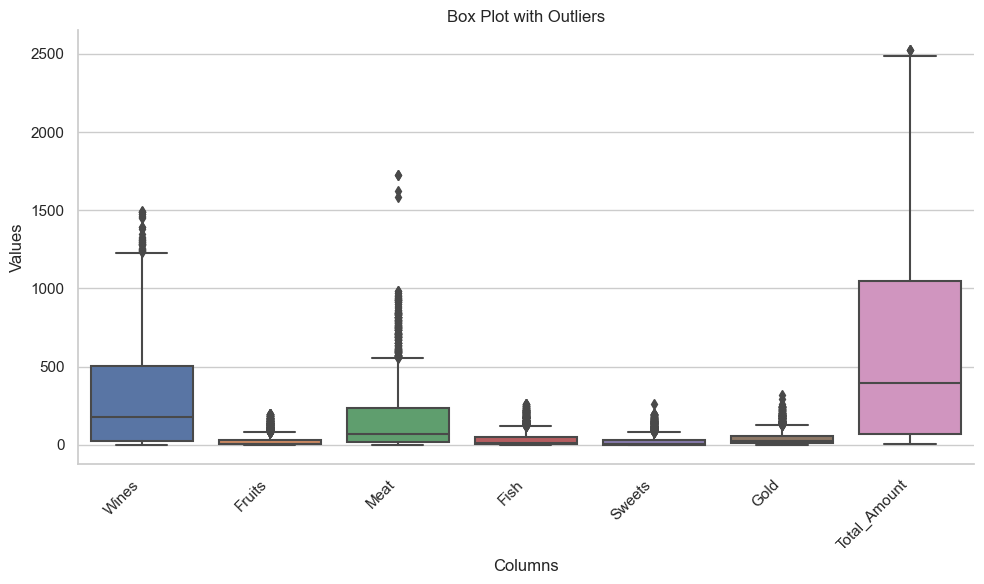

In [111]:

box_plot_with_outliers(product_df)
    

1. Most Amount spent can be Seen on Wines
2. Second most amount spent by customer is on Meat products folled my Fish

# Product and People 


In [112]:
product_people_df = pd.merge(people_df, product_df, left_index=True, right_index=True)

In [113]:
product_people_df

,Education,Income,Recency,Complain,Total_Offsprings,Living_With,Family_Size,Days_since_enrolment,Age,Wines,Fruits,Meat,Fish,Sweets,Gold,Total_Amount
0,Graduate,58138.0,58,0,0,Alone,1,663,66,635,88,546,172,88,88,1617
1,Graduate,46344.0,38,0,2,Alone,3,113,69,11,1,6,2,1,6,27
2,Graduate,71613.0,26,0,0,Partner,2,312,58,426,49,127,111,21,42,776
3,Graduate,26646.0,26,0,1,Partner,3,139,39,11,4,20,10,3,5,53
4,Postgraduate,58293.0,94,0,1,Partner,3,161,42,173,43,118,46,27,15,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,46,0,1,Partner,3,381,56,709,43,182,42,118,247,1341
2236,Postgraduate,64014.0,56,0,3,Partner,5,19,77,406,0,30,0,0,8,444
2237,Graduate,56981.0,91,0,0,Alone,1,155,42,908,48,217,32,12,24,1241
2238,Postgraduate,69245.0,8,0,1,Partner,3,156,67,428,30,214,80,30,61,843


# Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

In [114]:
promotion_df=df[['NumDealsPurchases','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Z_CostContact','Z_Revenue']]

In [115]:
promotion_df.head()

,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Z_CostContact,Z_Revenue
0,3,0,0,0,0,0,1,3,11
1,2,0,0,0,0,0,0,3,11
2,1,0,0,0,0,0,0,3,11
3,2,0,0,0,0,0,0,3,11
4,5,0,0,0,0,0,0,3,11


In [116]:
promotion_df.dtypes

NumDealsPurchases    int64
AcceptedCmp1         int64
AcceptedCmp2         int64
AcceptedCmp3         int64
AcceptedCmp4         int64
AcceptedCmp5         int64
Response             int64
Z_CostContact        int64
Z_Revenue            int64
dtype: object

In [117]:
promotion_df.isna().sum()

NumDealsPurchases    0
AcceptedCmp1         0
AcceptedCmp2         0
AcceptedCmp3         0
AcceptedCmp4         0
AcceptedCmp5         0
Response             0
Z_CostContact        0
Z_Revenue            0
dtype: int64

In [118]:
def scatter_plot(df, columns):
    plt.figure(figsize=(10, 6))  # Set figure size
    
    x = df.columns  # Use column labels as x-axis values
    for column in columns:
        y = df[column]  # Get values for the current column
        plt.scatter(x, y, label=column)
    
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.title('Scatter Plot')
    plt.legend()
    plt.show()

In [119]:
promotion_df.head()

,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Z_CostContact,Z_Revenue
0,3,0,0,0,0,0,1,3,11
1,2,0,0,0,0,0,0,3,11
2,1,0,0,0,0,0,0,3,11
3,2,0,0,0,0,0,0,3,11
4,5,0,0,0,0,0,0,3,11


In [120]:
promotion_df.columns

Index(['NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Z_CostContact',
       'Z_Revenue'],
      dtype='object')

In [59]:
columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'Response']

In [60]:
# Transform values in each column
promotion_df['AcceptedCmp1'] = promotion_df['AcceptedCmp1'].replace(1, 1)
promotion_df['AcceptedCmp2'] = promotion_df['AcceptedCmp2'].replace(1, 2)
promotion_df['AcceptedCmp3'] = promotion_df['AcceptedCmp3'].replace(1, 3)
promotion_df['AcceptedCmp4'] = promotion_df['AcceptedCmp4'].replace(1, 4)
promotion_df['AcceptedCmp5'] = promotion_df['AcceptedCmp5'].replace(1, 5)
promotion_df['Response'] = promotion_df['Response'].replace(1, 6)

In [61]:
promotion_df=add_columns(promotion_df,columns,new_column_name='Frequency')

In [ ]:
columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'Response','Z_CostContact','Z_Revenue']

In [62]:
promotion_df.drop(columns=columns,axis=1,inplace=True)

In [63]:
promotion_df

,NumDealsPurchases,Frequency
0,3,20
1,2,14
2,1,14
3,2,14
4,5,14
...,...,...
2235,2,14
2236,7,15
2237,1,18
2238,2,14


# Place 

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

In [315]:
place_df=df[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']]

In [316]:
place_df.head()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,8,10,4,7
1,1,1,2,5
2,8,2,10,4
3,2,0,4,6
4,5,3,6,5


In [317]:
place_df.dtypes

NumWebPurchases        int64
NumCatalogPurchases    int64
NumStorePurchases      int64
NumWebVisitsMonth      int64
dtype: object

In [318]:
place_df=add_columns(place_df,new_column_name='Total_purchases',column_names=['NumWebPurchases','NumCatalogPurchases','NumStorePurchases'])

In [319]:
place_df.head()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_purchases
0,8,10,4,7,22
1,1,1,2,5,4
2,8,2,10,4,20
3,2,0,4,6,6
4,5,3,6,5,14


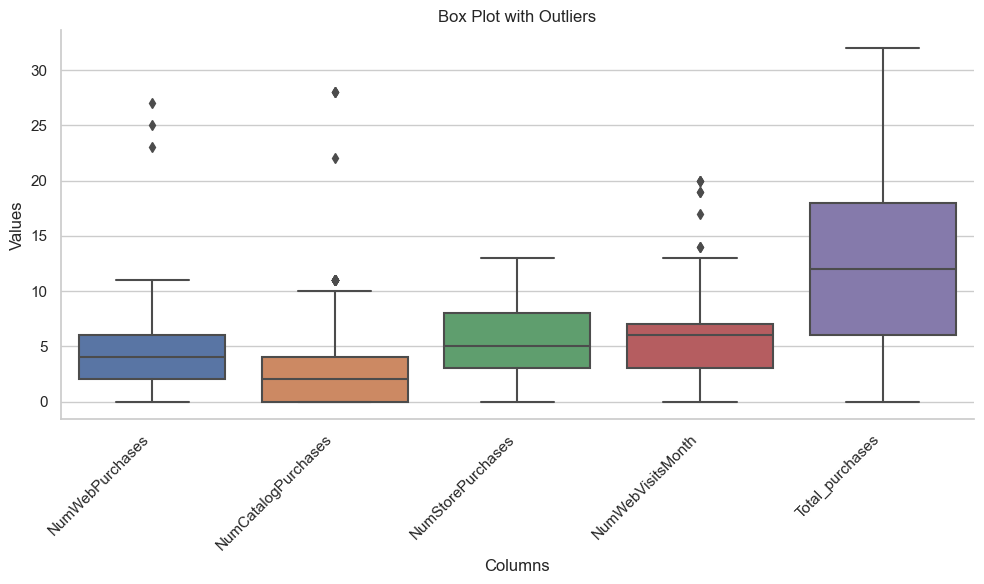

In [320]:
box_plot_with_outliers(place_df)

In [321]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from math import ceil


In [322]:
place_df.columns

Index(['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Total_purchases'],
      dtype='object')

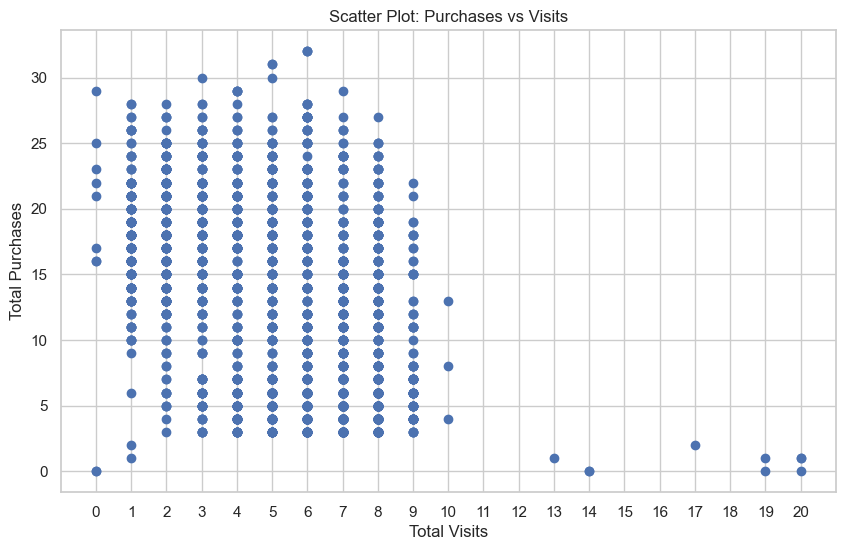

In [323]:
def scatter_plot_purchases_visits(df):
    plt.figure(figsize=(10, 6))  # Set figure size

    purchases = df['Total_purchases']
    visits = df['NumWebVisitsMonth']

    plt.scatter(visits, purchases)
    plt.xlabel('Total Visits')
    plt.ylabel('Total Purchases')
    plt.title('Scatter Plot: Purchases vs Visits')

    # Set x-axis tick locations as whole numbers
    max_value = max(visits)
    plt.xticks(range(0, ceil(max_value) + 1))

    plt.show()
    
scatter_plot_purchases_visits(place_df)

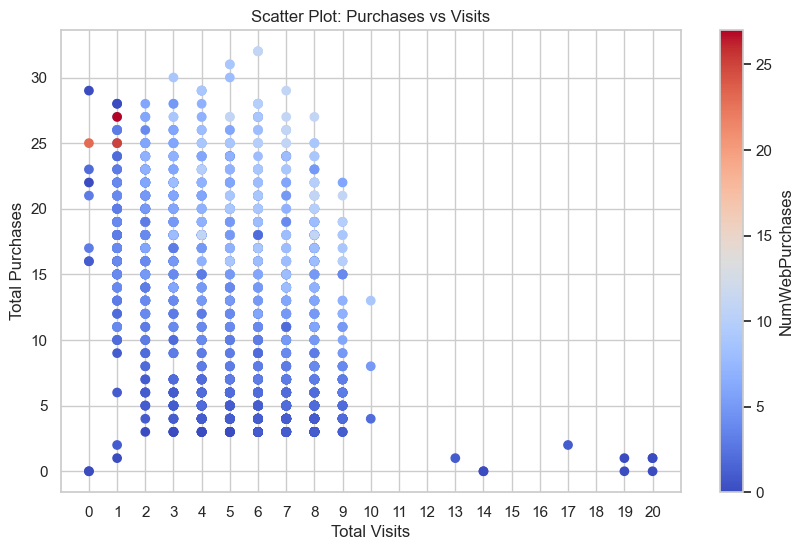

In [324]:
def scatter_plot_purchases_visits(df,column):
    plt.figure(figsize=(10, 6))  # Set figure size

    purchases = df['Total_purchases']
    visits = df['NumWebVisitsMonth']
    hue_labels = [column]
    hue_values = df[hue_labels].values

    plt.scatter(visits, purchases, c=hue_values, cmap='coolwarm')  # Use 'coolwarm' colormap
    plt.xlabel('Total Visits')
    plt.ylabel('Total Purchases')
    plt.title('Scatter Plot: Purchases vs Visits')
    plt.colorbar(label=column)  # Add colorbar legend

    # Set x-axis tick locations as whole numbers
    max_value = max(visits)
    plt.xticks(range(0, math.ceil(max_value) + 1))

    plt.show()

    
scatter_plot_purchases_visits(place_df,'NumWebPurchases')

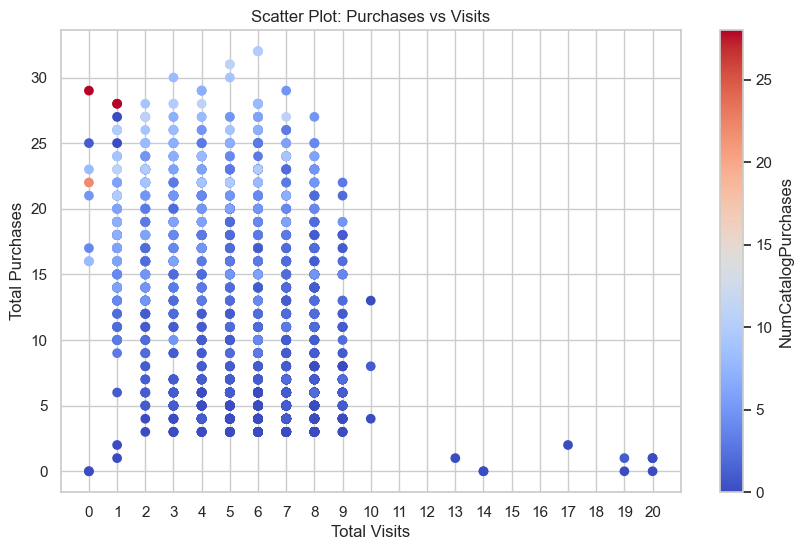

In [325]:
scatter_plot_purchases_visits(place_df,'NumCatalogPurchases')

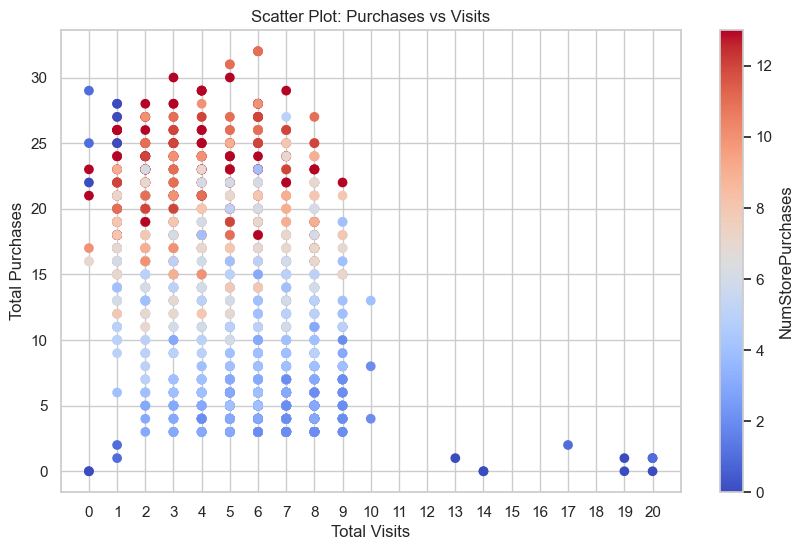

In [326]:
scatter_plot_purchases_visits(place_df,'NumStorePurchases')

Comparatively high amount of purchases can bee seen in the Store Visits as compared to Web or Catalog Purchaces

In [327]:
columns_drop=['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth']

In [328]:
place_df.drop(columns=columns_drop,axis=1,inplace=True)

# Concateinated  Dataframes

In [329]:
df = pd.merge(product_people_df, place_df, left_index=True, right_index=True)
df = pd.merge(df, promotion_df, left_index=True, right_index=True)

In [330]:
df

,Education,Income,Recency,Complain,Total_Offsprings,Living_With,Family_Size,Days_since_enrolment,Age,Wines,Fruits,Meat,Fish,Sweets,Gold,Total_Amount,Total_purchases,NumDealsPurchases,Frequency
0,Graduate,58138.0,58,0,0,Alone,1,663,66,635,88,546,172,88,88,1617,22,3,15
1,Graduate,46344.0,38,0,2,Alone,3,113,69,11,1,6,2,1,6,27,4,2,14
2,Graduate,71613.0,26,0,0,Partner,2,312,58,426,49,127,111,21,42,776,20,1,14
3,Graduate,26646.0,26,0,1,Partner,3,139,39,11,4,20,10,3,5,53,6,2,14
4,Postgraduate,58293.0,94,0,1,Partner,3,161,42,173,43,118,46,27,15,422,14,5,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,46,0,1,Partner,3,381,56,709,43,182,42,118,247,1341,16,2,14
2236,Postgraduate,64014.0,56,0,3,Partner,5,19,77,406,0,30,0,0,8,444,15,7,15
2237,Graduate,56981.0,91,0,0,Alone,1,155,42,908,48,217,32,12,24,1241,18,1,15
2238,Postgraduate,69245.0,8,0,1,Partner,3,156,67,428,30,214,80,30,61,843,21,2,14


In [331]:
df.columns

Index(['Education', 'Income', 'Recency', 'Complain', 'Total_Offsprings',
       'Living_With', 'Family_Size', 'Days_since_enrolment', 'Age', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Total_Amount',
       'Total_purchases', 'NumDealsPurchases', 'Frequency'],
      dtype='object')

In [332]:
df.dtypes

Education                object
Income                  float64
Recency                   int64
Complain                  int64
Total_Offsprings          int64
Living_With              object
Family_Size               int64
Days_since_enrolment      int64
Age                       int64
Wines                     int64
Fruits                    int64
Meat                      int64
Fish                      int64
Sweets                    int64
Gold                      int64
Total_Amount              int64
Total_purchases           int64
NumDealsPurchases         int64
Frequency                 int64
dtype: object

In [333]:
def get_numerical_columns(data_frame):
    numerical_columns = []
    for column in data_frame.columns:
        if pd.api.types.is_numeric_dtype(data_frame[column]):
            numerical_columns.append(column)
    return numerical_columns

numerical_columns=get_numerical_columns(df)

In [334]:
numerical_columns

['Income',
 'Recency',
 'Complain',
 'Total_Offsprings',
 'Family_Size',
 'Days_since_enrolment',
 'Age',
 'Wines',
 'Fruits',
 'Meat',
 'Fish',
 'Sweets',
 'Gold',
 'Total_Amount',
 'Total_purchases',
 'NumDealsPurchases',
 'Frequency']

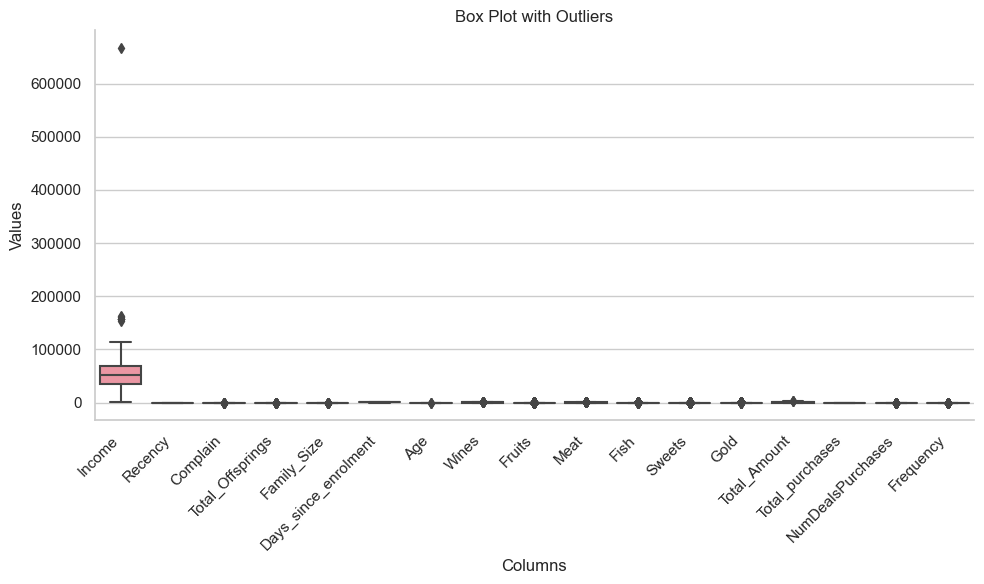

In [335]:
box_plot_with_outliers_column(df,numerical_columns)

Outliers in income can bee seen 

In [336]:

print('The total number of data points after removing outliers:', len(df))

The total number of data points after removing outliers: 2215


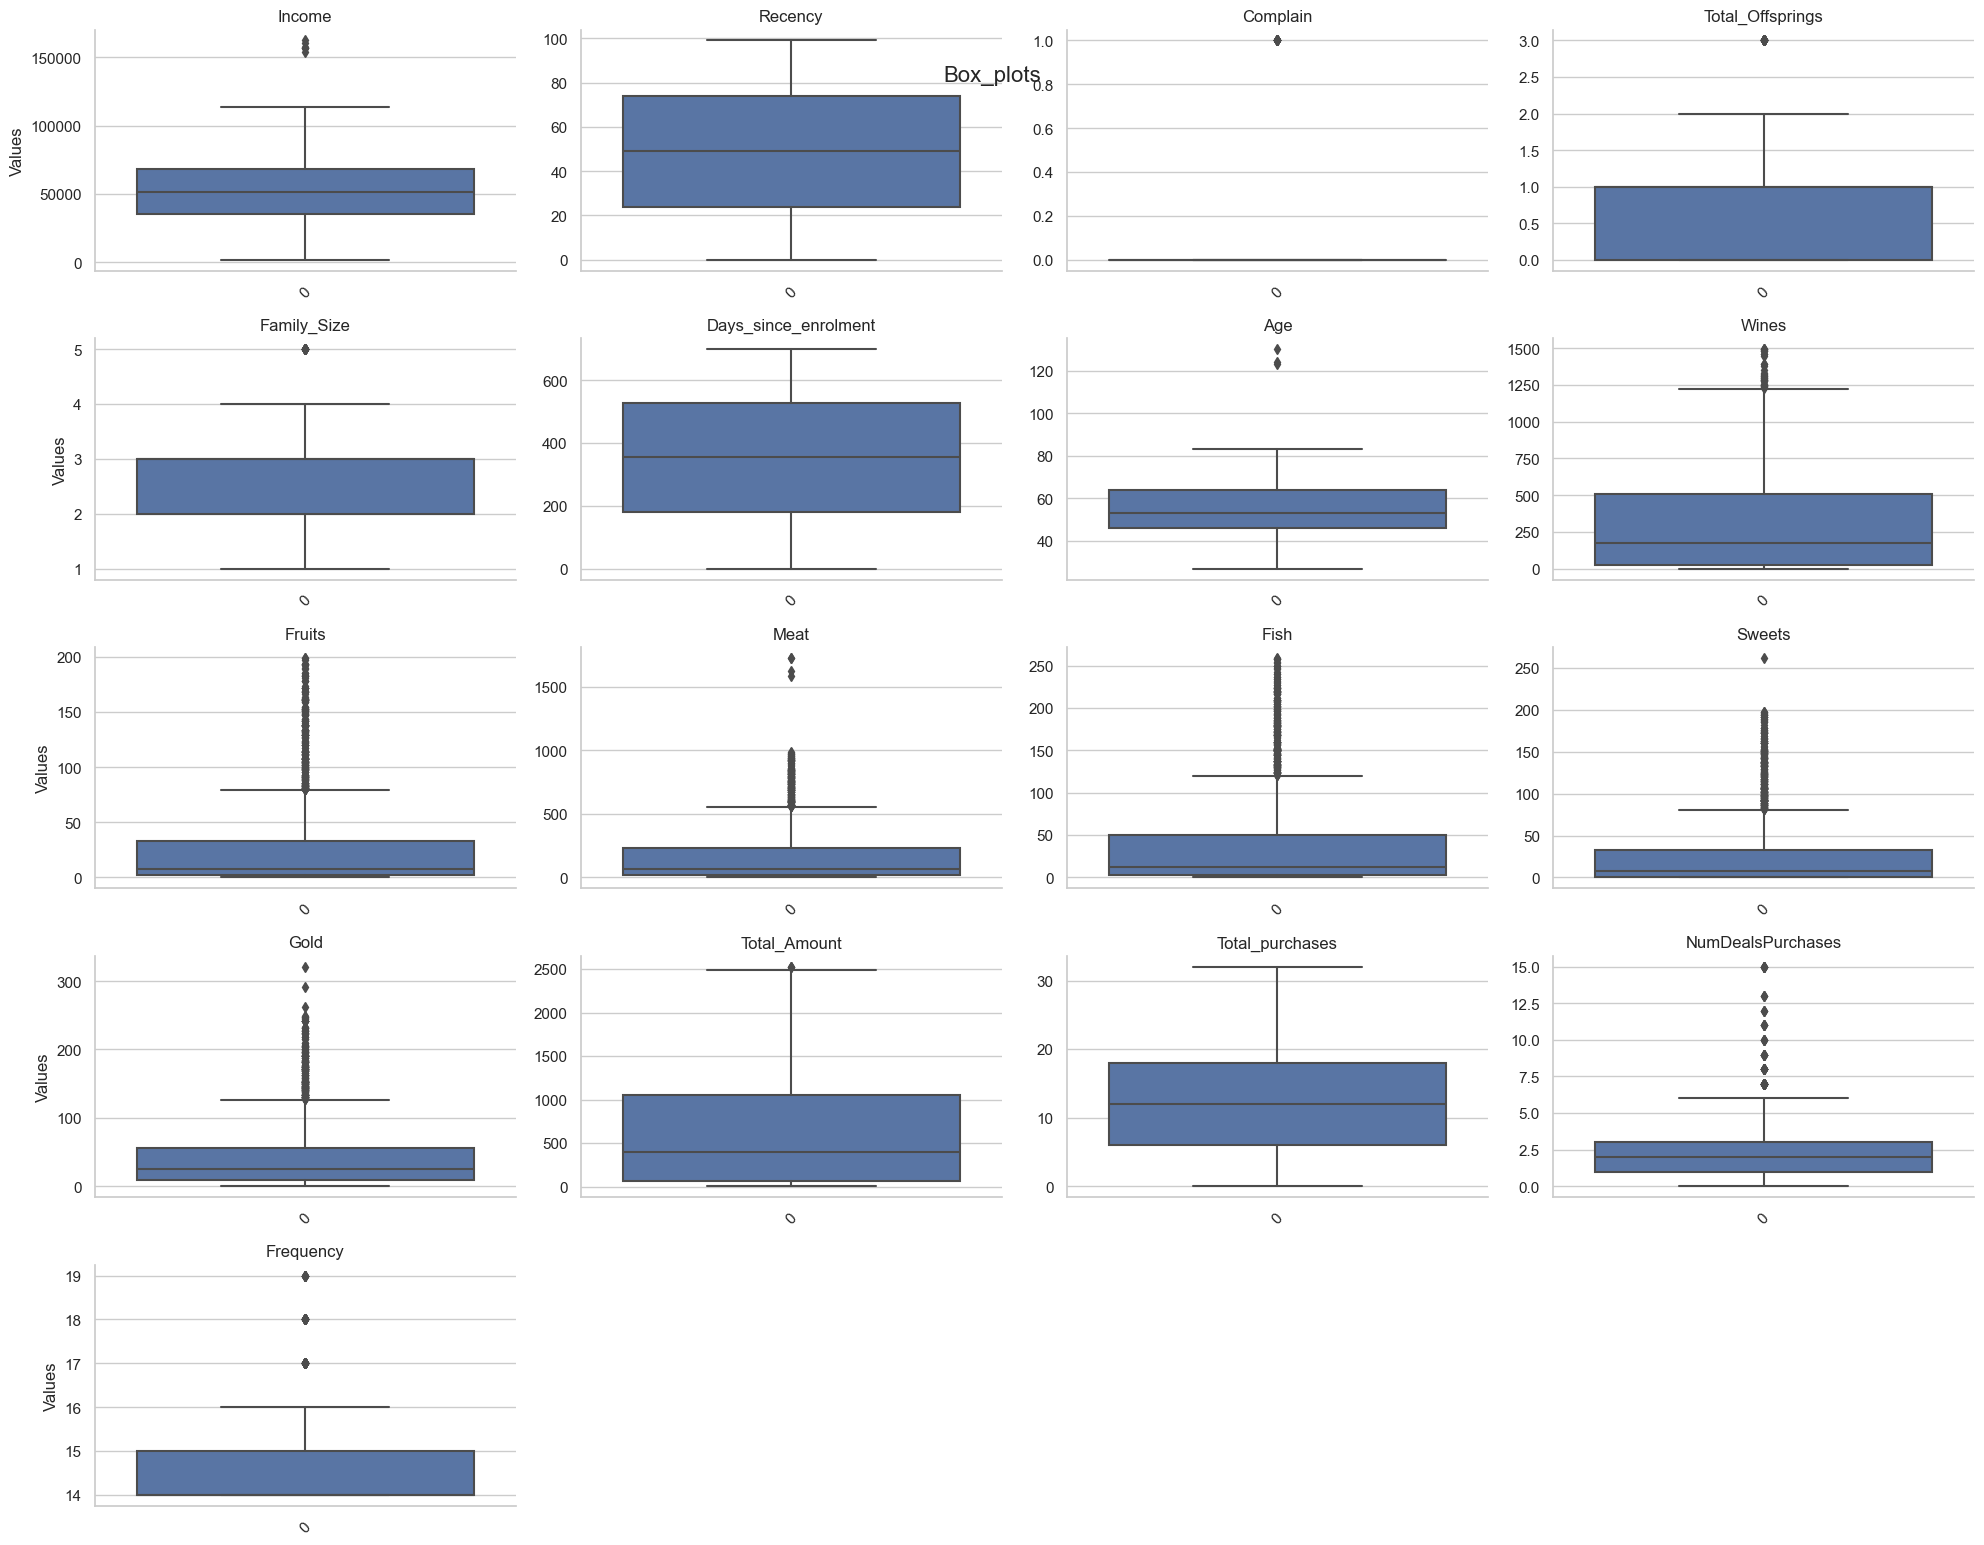

In [337]:

def boxplots_custom(dataset, columns_list, suptitle='Box_plots', size=(20, 16)):
    num_plots = len(columns_list)
    rows = math.ceil(math.sqrt(num_plots))
    cols = math.ceil(num_plots / rows)
    fig, axs = plt.subplots(rows, cols, figsize=size)
    fig.suptitle(suptitle, y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[i].set_ylabel('Values')
        sns.boxplot(data=dataset[data], orient='v', ax=axs[i])
        axs[i].set_title(data)
        axs[i].tick_params(axis='x', labelrotation=45)
        axs[i].spines['top'].set_visible(False)
        axs[i].spines['right'].set_visible(False)
    # Hide unused subplots if necessary
    if num_plots < len(axs):
        for j in range(num_plots, len(axs)):
            fig.delaxes(axs[j])
    plt.tight_layout()
    plt.show()
boxplots_custom(dataset=df,columns_list=numerical_columns)

In [338]:
df.head()

,Education,Income,Recency,Complain,Total_Offsprings,Living_With,Family_Size,Days_since_enrolment,Age,Wines,Fruits,Meat,Fish,Sweets,Gold,Total_Amount,Total_purchases,NumDealsPurchases,Frequency
0,Graduate,58138.0,58,0,0,Alone,1,663,66,635,88,546,172,88,88,1617,22,3,15
1,Graduate,46344.0,38,0,2,Alone,3,113,69,11,1,6,2,1,6,27,4,2,14
2,Graduate,71613.0,26,0,0,Partner,2,312,58,426,49,127,111,21,42,776,20,1,14
3,Graduate,26646.0,26,0,1,Partner,3,139,39,11,4,20,10,3,5,53,6,2,14
4,Postgraduate,58293.0,94,0,1,Partner,3,161,42,173,43,118,46,27,15,422,14,5,14


In [339]:
# Separate the categorical and numerical column names
categorical_cols = ['Education', 'Living_With']
numerical_cols = numerical_columns

# Reorder the columns in the DataFrame
ordered_cols = categorical_cols + numerical_cols
df = df[ordered_cols]

In [340]:
df.columns

Index(['Education', 'Living_With', 'Income', 'Recency', 'Complain',
       'Total_Offsprings', 'Family_Size', 'Days_since_enrolment', 'Age',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Total_Amount',
       'Total_purchases', 'NumDealsPurchases', 'Frequency'],
      dtype='object')

In [341]:
dataframe=df.copy()

In [342]:
df['Education'].unique()


array(['Graduate', 'Postgraduate', 'Undergrade'], dtype=object)

Map encoding

In [343]:
education_mapping = {
    'Graduate': 3,
    'Postgraduate': 2,
    'Undergrade': 1
}

df['Education'] = df['Education'].map(education_mapping).astype('int')


In [344]:


df['Living_With'] = df['Living_With'].map({'Alone': 0, 'Partner': 1}).astype(int)

In [345]:
df.columns

Index(['Education', 'Living_With', 'Income', 'Recency', 'Complain',
       'Total_Offsprings', 'Family_Size', 'Days_since_enrolment', 'Age',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Total_Amount',
       'Total_purchases', 'NumDealsPurchases', 'Frequency'],
      dtype='object')

In [346]:
df.head()

,Education,Living_With,Income,Recency,Complain,Total_Offsprings,Family_Size,Days_since_enrolment,Age,Wines,Fruits,Meat,Fish,Sweets,Gold,Total_Amount,Total_purchases,NumDealsPurchases,Frequency
0,3,0,58138.0,58,0,0,1,663,66,635,88,546,172,88,88,1617,22,3,15
1,3,0,46344.0,38,0,2,3,113,69,11,1,6,2,1,6,27,4,2,14
2,3,1,71613.0,26,0,0,2,312,58,426,49,127,111,21,42,776,20,1,14
3,3,1,26646.0,26,0,1,3,139,39,11,4,20,10,3,5,53,6,2,14
4,2,1,58293.0,94,0,1,3,161,42,173,43,118,46,27,15,422,14,5,14


In [347]:
df.dtypes

Education                 int32
Living_With               int32
Income                  float64
Recency                   int64
Complain                  int64
Total_Offsprings          int64
Family_Size               int64
Days_since_enrolment      int64
Age                       int64
Wines                     int64
Fruits                    int64
Meat                      int64
Fish                      int64
Sweets                    int64
Gold                      int64
Total_Amount              int64
Total_purchases           int64
NumDealsPurchases         int64
Frequency                 int64
dtype: object

# Heat Map

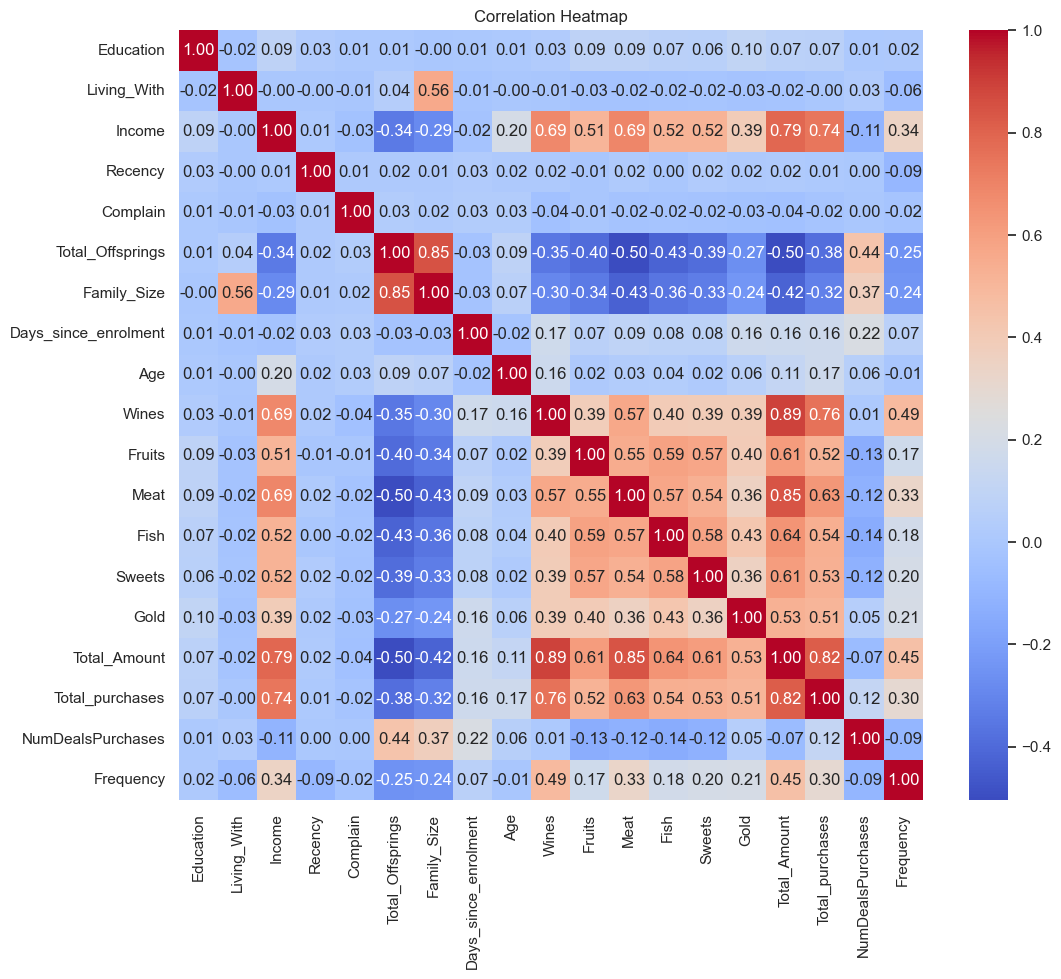

In [349]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Increase the size of the heatmap
plt.figure(figsize=(12, 10))

# Create the heatmap using the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Set the title and display the heatmap
plt.title("Correlation Heatmap")
plt.show()

- The is a strong relationship between Income and Total_Amount spent of items with 0.79
- The is a strong relationship between Income and Total_purchases spent of items with 0.74

-  Family size and Total offsprings are highly coreretaed - 0.85

# Scaling

Standard scaler is essential because it brings all features to a common scale, allowing for fair feature comparison, facilitating convergence in optimization algorithms, handling varying feature units, and mitigating the impact of outliers.

In [191]:

from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
import pandas as pd

class DataScaler:
    def __init__(self):
        self.scaler = StandardScaler()
        self.scaled_data = None
        self.df_scaled = None

    def fit_transform(self, data):
        self.scaled_data = self.scaler.fit_transform(data)
        self.df_scaled = pd.DataFrame(self.scaled_data, columns=data.columns)
        self.df_scaled = self.df_scaled - self.df_scaled.min()  # Shift to make values positive
        return self.df_scaled
    
 
    

In [192]:
Scaler=DataScaler()
df_scaled=Scaler.fit_transform(df)

In [193]:
df_scaled.head()

,Education,Living_With,Income,Recency,Complain,Total_Offsprings,Family_Size,Days_since_enrolment,Age,Wines,Fruits,Meat,Fish,Sweets,Gold,Total_Amount,Total_purchases,NumDealsPurchases,Frequency
0,2.926778,0.00,2.621012,2.003934,0.0,0.000000,0.000000,3.275157,3.254259,1.882769,2.211441,2.434664,3.141641,2.142771,1.698482,2.674235,3.054010,1.559750,1.120587
1,2.926778,0.00,2.073001,1.312922,0.0,2.670009,2.208284,0.558209,3.504587,0.032615,0.025130,0.026755,0.036531,0.024350,0.115806,0.036497,0.555275,1.039833,0.000000
2,2.926778,2.09,3.247131,0.898315,0.0,0.000000,1.104142,1.541251,2.586719,1.263086,1.231371,0.566305,2.027454,0.511343,0.810639,1.279054,2.776373,0.519917,0.000000
3,2.926778,2.09,1.157728,0.898315,0.0,1.335005,2.208284,0.686647,1.001311,0.032615,0.100520,0.089182,0.182654,0.073049,0.096505,0.079630,0.832912,1.039833,0.000000
4,1.463389,2.09,2.628214,3.247755,0.0,1.335005,2.208284,0.795325,1.251638,0.512943,1.080591,0.526173,0.840206,0.657441,0.289514,0.691784,1.943461,2.599583,0.000000


# PCA 


PCA (Principal Component Analysis) is a dimensionality reduction technique used to transform a high-dimensional dataset into a lower-dimensional space while retaining the most important information. It accomplishes this by identifying the principal components, which are linear combinations of the original features that capture the maximum variance in the data.

In [194]:
from sklearn.decomposition import PCA

In [195]:
df.shape

(2215, 19)

In [196]:
# Fit our standardized data using PCA
pca = PCA()

# Fit PCA on scaled data
pca.fit(df_scaled)

PCA()

### Variance Ratio

- The variance ratio indicates the relative importance or contribution of each principal component in explaining the overall variance in the data. It is expressed as a percentage or a decimal value. The sum of the variance ratios of all the principal components is equal to 100% or 1.
-  Higher variance ratios indicate that the corresponding principal components contain more significant information and contribute more to explaining the variability in the data. On the other hand, lower variance ratios suggest that the corresponding principal components capture less important or less variable information.
- This plot helps in determining the number of principal components needed to retain a desired proportion of the total variance. The point at which the cumulative variance levels off or reaches a plateau is often considered as a cutoff point for selecting the number of principal components.

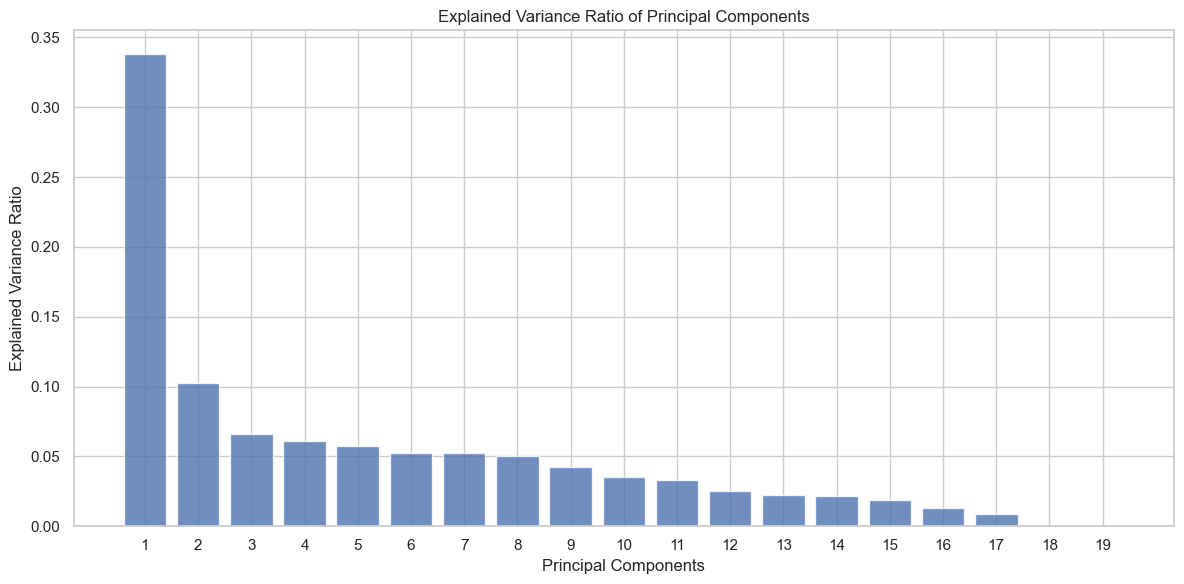

In [197]:
def plot_feature_info(dataframe, pca):
    num_features = len(dataframe.columns)

    plt.figure(figsize=(12, 6))
    plt.bar(range(1, num_features+1), pca.explained_variance_ratio_, align='center', alpha=0.8)
    plt.xticks(range(1, num_features+1))
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio of Principal Components')
    plt.tight_layout()
    plt.show()

plot_feature_info(df,pca)


The selection of components ultimately relies on personal preference. 
Generally, it is advised that the cumulative variance explained by all components falls within the range of 70% to 80%. 

- In this particular scenario, this would correspond to approximately 6 components. However, for the current example, only 2 components will be chosen, retaining slightly  50% of the total variance. 
- Although this level of variance retention may not be considered ideal, it still represents a reasonable amount. Notably, PC1, the first principal component, accounts for approximately 35% of the overall variation in the dataset, exerting the most significant influence on it.

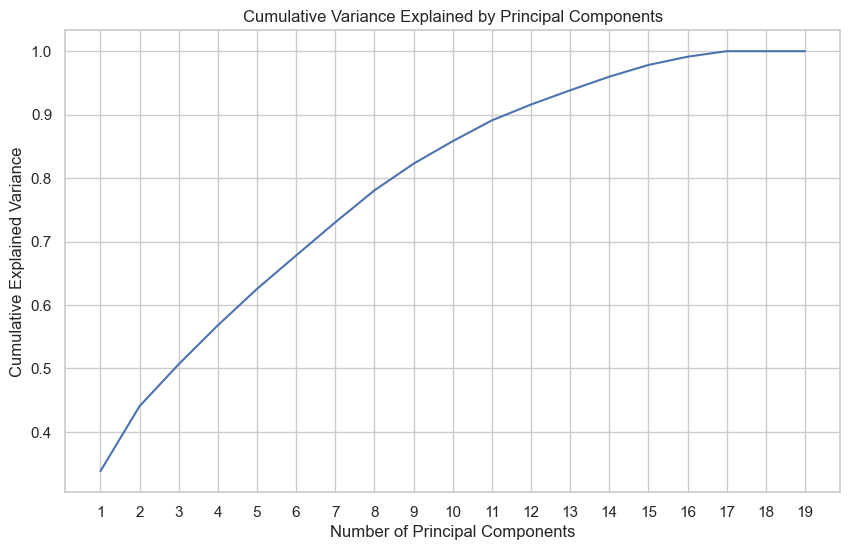

In [198]:
def plot_cumulative_variance(pca):
    num_components = pca.n_components_
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_components+1), cumulative_variance)
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Variance Explained by Principal Components')
    plt.grid(True)
    plt.xticks(range(1, num_components+1))
    plt.show()
plot_cumulative_variance(pca)

In [199]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [201]:
# We choose 3 components
pca = PCA(n_components = 3)

# Fit the model with our data with the 3 selected components
pca.fit(df_scaled)

PCA(n_components=3)

In [202]:
def get_component_features(pca, feature_names, num_components):
    """
    Get the features contributing to each component in PCA.

    Args:
        pca (PCA): Pre-fitted PCA object.
        feature_names (list): List of feature names.
        num_components (int): Number of components to consider.

    Returns:
        List of dictionaries, where each dictionary contains the features and their contributions for a component.
    """
    # Get the eigenvectors
    eigenvectors = pca.components_

    # Extract features and their contributions for each component
    component_features = []

    for component_index in range(num_components):
        component_dict = {}
        component_eigenvector = eigenvectors[component_index]
        contributions = dict(zip(feature_names, component_eigenvector))
        sorted_contributions = sorted(contributions.items(), key=lambda x: abs(x[1]), reverse=True)
        component_dict['Component'] = component_index + 1
        component_dict['Features'] = sorted_contributions
        component_features.append(component_dict)

    return component_features

component_features=get_component_features(pca=pca,num_components=3,feature_names=df_scaled.columns)

In [203]:
def create_component_dataframe(component_features):
    """
    Create a DataFrame from the component features list.

    Args:
        component_features (list): List of dictionaries containing the component features and contributions.

    Returns:
        Pandas DataFrame with columns: 'Component', 'Feature', 'Contribution'.
    """
    data = []

    for component in component_features:
        component_index = component['Component']
        features = component['Features']
        for feature, contribution in features:
            data.append({'Component': component_index, 'Feature': feature, 'Contribution': contribution})

    df = pd.DataFrame(data)
    return df

In [204]:
# Assuming you have the component features list called 'component_features'
Component_df = create_component_dataframe(component_features)



In [205]:
Component_df

,Component,Feature,Contribution
0,1,Total_Amount,0.376643
1,1,Total_purchases,0.328539
2,1,Meat,0.326737
3,1,Income,0.319847
4,1,Wines,0.307937
5,1,Fish,0.287365
6,1,Fruits,0.277604
7,1,Sweets,0.276455
8,1,Total_Offsprings,-0.251897
9,1,Gold,0.227202


In [206]:
# The calculated resulting components scores for the elements in our data set:
df_pca = pca.transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['F1', 'F2','F3'])

df_pca

,F1,F2,F3
0,4.755970,-0.358253,1.349262
1,-2.515813,-0.270110,0.105087
2,1.712529,-0.475181,-1.075118
3,-2.438501,-0.763339,-1.087679
4,-0.551532,0.673582,-0.903320
...,...,...,...
2210,2.607730,1.587079,-0.638610
2211,-2.046029,4.105674,-0.381224
2212,2.139429,-1.892519,0.777608
2213,1.051976,0.906119,-1.170039


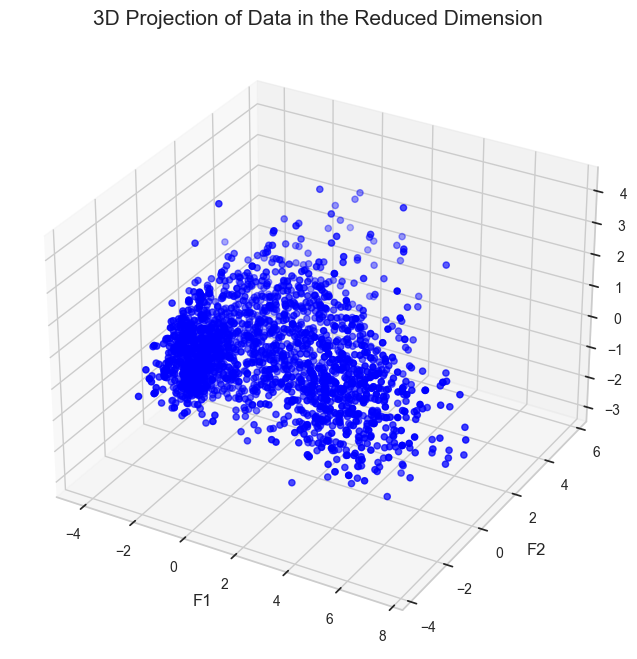

In [207]:
def create_3d_plot(df_pca):
    x = df_pca["F1"]
    y = df_pca["F2"]
    z = df_pca["F3"]

    # Creating the plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(x, y, z, c="blue", marker="o")

    # Set labels and title
    ax.set_xlabel("F1", fontsize=12)
    ax.set_ylabel("F2", fontsize=12)
    ax.set_zlabel("F3", fontsize=12)
    ax.set_title("3D Projection of Data in the Reduced Dimension", fontsize=15)

    # Set ticks and grid
    ax.tick_params(axis="x", labelsize=10)
    ax.tick_params(axis="y", labelsize=10)
    ax.tick_params(axis="z", labelsize=10)
    ax.grid(True, linestyle="-", linewidth=0.5, alpha=0.7)

    # Show the plot
    plt.show()
    
create_3d_plot(df_pca)

# Clustering

In [350]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def kmeans_elbow_plot(data, max_clusters):
    # Calculate sum of squared distances for different values of k
    wcss = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++')
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)  # Append the WCSS value

    # Plot the elbow plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='-', color='b')
    plt.xlabel('Number of Clusters', fontsize=12)
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
    plt.title('Elbow Plot for K-means Clustering', fontsize=15)
    plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.7)
    plt.show()

    return kmeans
    
    


The Within-Cluster Sum of Squares (WCSS) is a useful metric in determining the optimal number of clusters in K-means clustering. The WCSS measures the compactness of the data points within each cluster. As the number of clusters increases, the WCSS tends to decrease because each data point can be assigned to a closer centroid. However, after a certain point, the improvement in WCSS diminishes significantly, resulting in a less significant decrease in subsequent iterations.

## Elbow point

The elbow point, also known as the "elbow method" or "elbow curve," is a technique used to determine the optimal number of clusters in a dataset for clustering algorithms like k-means. The elbow point represents a balance between minimizing within-cluster variance (compactness) and maximizing between-cluster variance (separation).

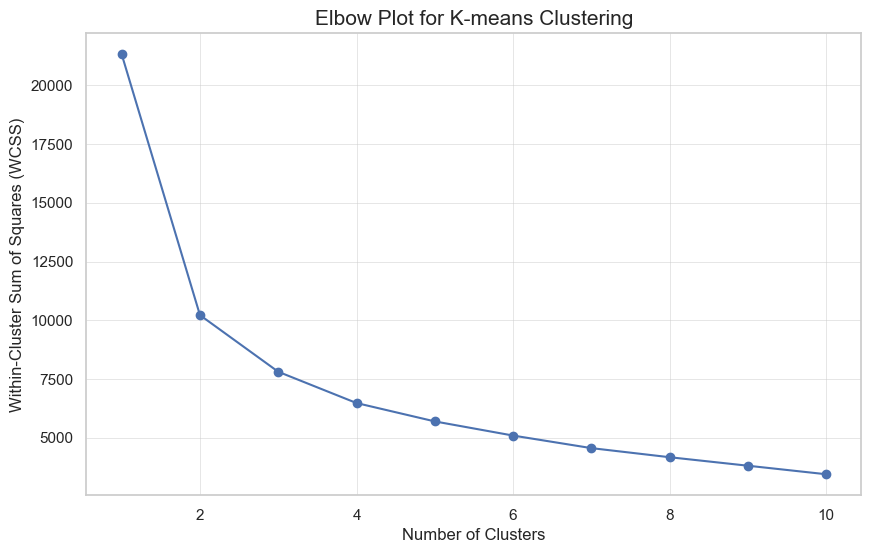

In [351]:
kmeans=kmeans_elbow_plot(df_pca,max_clusters=10)

In [210]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

In [211]:
clustering_params = {
    'kmeans': {'n_clusters': 4,'init':'k-means++'},
    'agg': {'n_clusters': 5},
    'dbscan': {'eps': 0.5, 'min_samples': 5},
    'gmm': {'n_components': 5}
}

In [212]:
def perform_clustering(dataframe, clustering_params):
    clustering_results = {}
    fitted_models = {}

    for technique, params in clustering_params.items():
        if technique == 'kmeans':
            n_clusters = params['n_clusters']
            init=params['init']
            kmeans = KMeans(n_clusters=n_clusters,init=init)
            kmeans.fit(dataframe)
            clustering_results[technique] = {'labels': kmeans.labels_, 'centers': kmeans.cluster_centers_}
            fitted_models[technique] = kmeans
        elif technique == 'agg':
            n_clusters = params['n_clusters']
            agg = AgglomerativeClustering(n_clusters=n_clusters)
            labels = agg.fit_predict(dataframe)
            clustering_results[technique] = {'labels': labels}
            fitted_models[technique] = agg
        elif technique == 'dbscan':
            eps = params['eps']
            min_samples = params['min_samples']
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(dataframe)
            clustering_results[technique] = {'labels': labels}
            fitted_models[technique] = dbscan
        elif technique == 'gmm':
            # Replace G with the actual GMM class you want to use
            gmm = GaussianMixture()  # Replace with the appropriate parameters
            labels = gmm.fit_predict(dataframe)
            clustering_results[technique] = {'labels': labels}
            fitted_models[technique] = gmm

    return clustering_results, fitted_models

clustering_results, fitted_models=perform_clustering(dataframe=df_pca,clustering_params=clustering_params)

In [213]:
clustering_results

{'kmeans': {'labels': array([2, 3, 2, ..., 2, 1, 3]),
  'centers': array([[-1.36806501, -1.62439332,  0.65558345],
         [ 0.64202233,  1.41374478,  0.60751478],
         [ 3.5348798 , -0.39743736, -0.32352886],
         [-2.25856604,  0.2983389 , -0.43471617]])},
 'agg': {'labels': array([1, 0, 4, ..., 1, 4, 0], dtype=int64)},
 'dbscan': {'labels': array([-1,  0,  0, ...,  5,  0,  0], dtype=int64)},
 'gmm': {'labels': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)}}

In [214]:
clustering_results_df = pd.DataFrame(clustering_results)

In [215]:
clustering_results_df

,kmeans,agg,dbscan,gmm
labels,"[2, 3, 2, 3, 3, 1, 1, 3, 3, 3, 0, 2, 3, 0, 2, ...","[1, 0, 4, 0, 0, 0, 2, 0, 0, 0, 3, 1, 0, 3, 1, ...","[-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, -1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
centers,"[[-1.3680650115030533, -1.6243933215183384, 0....",NaN,NaN,NaN


In [216]:
fitted_models

{'kmeans': KMeans(n_clusters=4),
 'agg': AgglomerativeClustering(n_clusters=5),
 'dbscan': DBSCAN(),
 'gmm': GaussianMixture()}

In [217]:
def plot_clusters(dataframe, clustering_results):
    num_plots = len(clustering_results)
    plt.figure(figsize=(5 * num_plots, 4))

    for i, (technique, results) in enumerate(clustering_results.items()):
        plt.subplot(1, num_plots, i + 1)
        labels = results['labels']
        if technique == 'kmeans':
            centers = results['centers']
            plt.scatter(dataframe.iloc[:, 0], dataframe.iloc[:, 1], c=labels, cmap='viridis')
            plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200)
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.title('K-means Clustering')
        elif technique == 'agg':
            plt.scatter(dataframe.iloc[:, 0], dataframe.iloc[:, 1], c=labels, cmap='viridis')
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.title('Agglomerative Clustering')
        elif technique == 'dbscan':
            plt.scatter(dataframe.iloc[:, 0], dataframe.iloc[:, 1], c=labels, cmap='viridis')
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.title('DBSCAN Clustering')
            
        elif technique == 'gmm':
            plt.scatter(dataframe.iloc[:, 0], dataframe.iloc[:, 1], c=labels, cmap='viridis')
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.title('GMM Clustering')

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

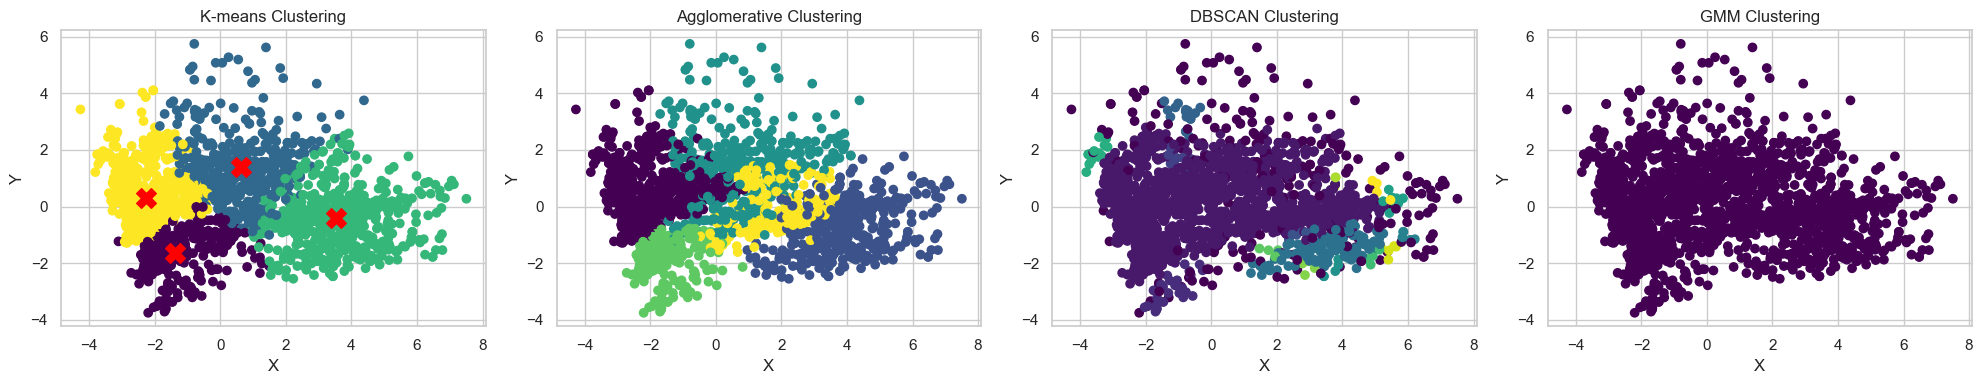

In [218]:
plot_clusters(dataframe=df_pca, clustering_results=clustering_results)

In [219]:
from sklearn.metrics import silhouette_score


# Silhouette score

- The silhouette score is a widely used metric for evaluating the quality of clustering results. It measures how well each sample in a cluster is separated from samples in other clusters. A higher silhouette score indicates better-defined clusters.
- silhouette scores obtained from different clustering models. The model with the highest silhouette score is considered the best in terms of cluster separation.

In [220]:
def plot_silhouette_scores(dataframe, clustering_params):
    silhouette_scores = {}

    for technique, params in clustering_params.items():
        if technique == 'kmeans':
            n_clusters = params['n_clusters']
            kmeans = KMeans(n_clusters=n_clusters)
            kmeans.fit(dataframe)
            labels = kmeans.labels_
        elif technique == 'agg':
            n_clusters = params['n_clusters']
            agg = AgglomerativeClustering(n_clusters=n_clusters)
            labels = agg.fit_predict(dataframe)
        elif technique == 'dbscan':
            eps = params['eps']
            min_samples = params['min_samples']
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(dataframe)
            
        elif technique == 'gmm':
            components = params['n_components']
            gmm = GaussianMixture(n_components=components)
            labels = gmm.fit_predict(dataframe)

        score = silhouette_score(dataframe, labels)
        silhouette_scores[technique] = score

    # Plot silhouette scores
    plt.figure(figsize=(8, 6))
    bars = plt.bar(range(len(silhouette_scores)), silhouette_scores.values(), align='center', color='skyblue')
    plt.xticks(range(len(silhouette_scores)), silhouette_scores.keys())
    plt.xlabel('Clustering Technique')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores for Clustering Techniques')

    # Add the silhouette scores on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

    plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
    plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add horizontal grid lines
    plt.tight_layout()  # Adjust spacing
    plt.show()

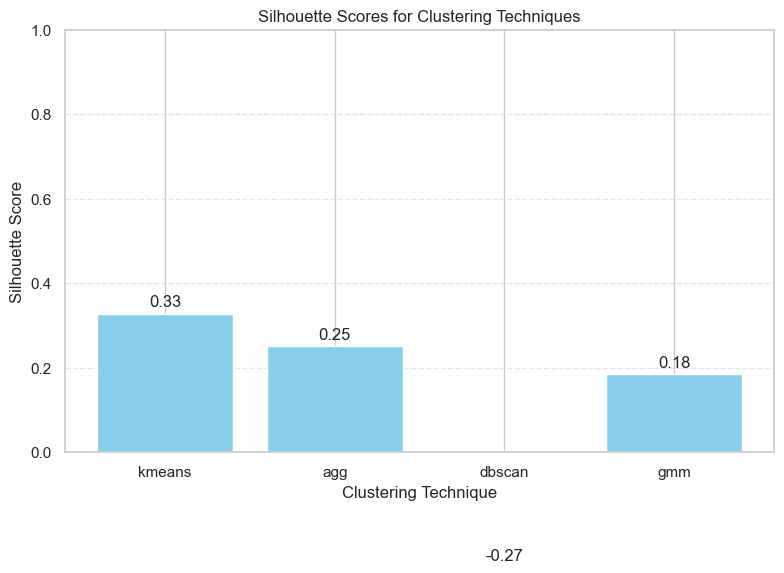

In [221]:
plot_silhouette_scores(dataframe=df_pca, clustering_params=clustering_params)

### Selecting Kmeans

In [222]:
clustering_results_df

,kmeans,agg,dbscan,gmm
labels,"[2, 3, 2, 3, 3, 1, 1, 3, 3, 3, 0, 2, 3, 0, 2, ...","[1, 0, 4, 0, 0, 0, 2, 0, 0, 0, 3, 1, 0, 3, 1, ...","[-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, -1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
centers,"[[-1.3680650115030533, -1.6243933215183384, 0....",NaN,NaN,NaN


In [223]:
clustering_results

{'kmeans': {'labels': array([2, 3, 2, ..., 2, 1, 3]),
  'centers': array([[-1.36806501, -1.62439332,  0.65558345],
         [ 0.64202233,  1.41374478,  0.60751478],
         [ 3.5348798 , -0.39743736, -0.32352886],
         [-2.25856604,  0.2983389 , -0.43471617]])},
 'agg': {'labels': array([1, 0, 4, ..., 1, 4, 0], dtype=int64)},
 'dbscan': {'labels': array([-1,  0,  0, ...,  5,  0,  0], dtype=int64)},
 'gmm': {'labels': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)}}

In [224]:
kmeans_labels_array=clustering_results['kmeans']['labels']

In [225]:
kmeans_labels_array

array([2, 3, 2, ..., 2, 1, 3])

In [226]:
df.head()

,Education,Living_With,Income,Recency,Complain,Total_Offsprings,Family_Size,Days_since_enrolment,Age,Wines,Fruits,Meat,Fish,Sweets,Gold,Total_Amount,Total_purchases,NumDealsPurchases,Frequency
0,3,0,58138.0,58,0,0,1,663,66,635,88,546,172,88,88,1617,22,3,15
1,3,0,46344.0,38,0,2,3,113,69,11,1,6,2,1,6,27,4,2,14
2,3,1,71613.0,26,0,0,2,312,58,426,49,127,111,21,42,776,20,1,14
3,3,1,26646.0,26,0,1,3,139,39,11,4,20,10,3,5,53,6,2,14
4,2,1,58293.0,94,0,1,3,161,42,173,43,118,46,27,15,422,14,5,14


In [227]:
# Create the 'cluster' column in the dataframe and assign the label_array values to it
df['cluster'] = kmeans_labels_array

In [228]:
df['cluster']

0       2
1       3
2       2
3       3
4       3
       ..
2235    2
2236    3
2237    2
2238    1
2239    3
Name: cluster, Length: 2215, dtype: int32

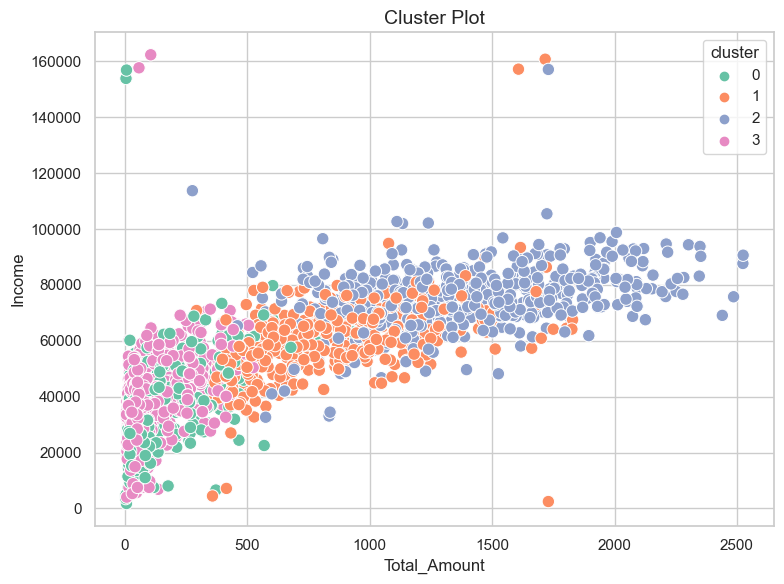

In [229]:
def plot_clusters(df, x_col, y_col, cluster_col):
    # Set the style of the plot
    sns.set(style="whitegrid")

    # Define the color palette for the clusters
    cluster_palette = sns.color_palette("Set2", df[cluster_col].nunique())

    # Create the scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=x_col, y=y_col, hue=cluster_col, palette=cluster_palette, s=80)

    # Set the axis labels and title
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.title("Cluster Plot", fontsize=14)

    # Display the legend
    plt.legend(title=cluster_col)

    # Adjust the plot layout
    plt.tight_layout()

    # Show the plot
    plt.show()
    
plot_clusters(df=df,x_col='Total_Amount',y_col='Income',cluster_col='cluster')

In [240]:
#Define name of customer groups according to clusters
re_clust = {
    0: 'Avg customer',
    1: 'Potentially Good customer',
    2: 'Good customer',
    3: 'Avg customer'}
df['Clusters_Customers'] = df['cluster'].map(re_clust)

In [241]:
dataframe['Clusters_Customers']=df['Clusters_Customers']

In [242]:
dataframe.head()

,Education,Living_With,Income,Recency,Complain,Total_Offsprings,Family_Size,Days_since_enrolment,Age,Wines,Fruits,Meat,Fish,Sweets,Gold,Total_Amount,Total_purchases,NumDealsPurchases,Frequency,Clusters_Customers
0,Graduate,Alone,58138.0,58,0,0,1,663,66,635,88,546,172,88,88,1617,22,3,15,Good customer
1,Graduate,Alone,46344.0,38,0,2,3,113,69,11,1,6,2,1,6,27,4,2,14,Avg customer
2,Graduate,Partner,71613.0,26,0,0,2,312,58,426,49,127,111,21,42,776,20,1,14,Good customer
3,Graduate,Partner,26646.0,26,0,1,3,139,39,11,4,20,10,3,5,53,6,2,14,Avg customer
4,Postgraduate,Partner,58293.0,94,0,1,3,161,42,173,43,118,46,27,15,422,14,5,14,Avg customer


In [243]:
def plot_cluster_boxplot(df, cluster_col, y_col):
    # Set the style of the plot
    sns.set(style="whitegrid")

    # Create the box plot
    plt.figure()
    pal = sns.color_palette("Set2", df[cluster_col].nunique())
    pl = sns.swarmplot(x=df[cluster_col], y=df[y_col], color="gray", alpha=0.5)
    pl = sns.boxenplot(x=df[cluster_col], y=df[y_col], palette=pal)
    pl.set_title("Boxplot of customers clusters", pad=10, size=15)

    # Adjust the plot layout
    plt.tight_layout()

    # Show the plot
    plt.show()

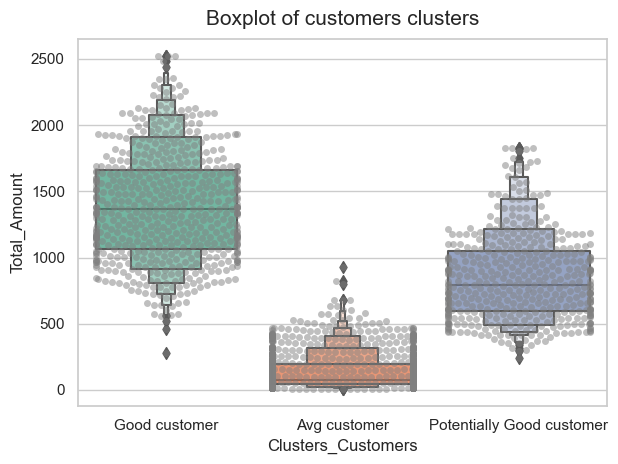

In [245]:
plot_cluster_boxplot(df=dataframe,cluster_col='Clusters_Customers',y_col='Total_Amount')

In [248]:
def plot_cluster_histogram(df, cluster_col, col):
    # Set the style of the plot
    sns.set(style="whitegrid")

    # Get unique cluster labels
    cluster_labels = df[cluster_col].unique()

    # Create the histogram plot
    plt.figure(figsize=(8, 6))
    for label in cluster_labels:
        sns.histplot(data=df[df[cluster_col] == label], x=col, label=f' {label}', alpha=0.7)

    # Set the axis labels and title
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.title("Histogram of Income by Cluster", fontsize=14)

    # Display the legend
    plt.legend(title=cluster_col)

    # Adjust the plot layout
    plt.tight_layout()

    # Show the plot
    plt.show()

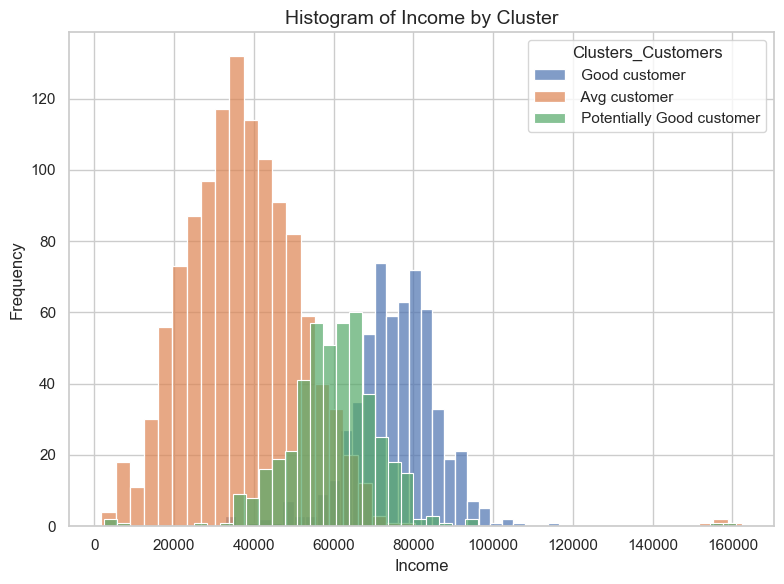

In [249]:
plot_cluster_histogram(df=dataframe,cluster_col='Clusters_Customers',col='Income')

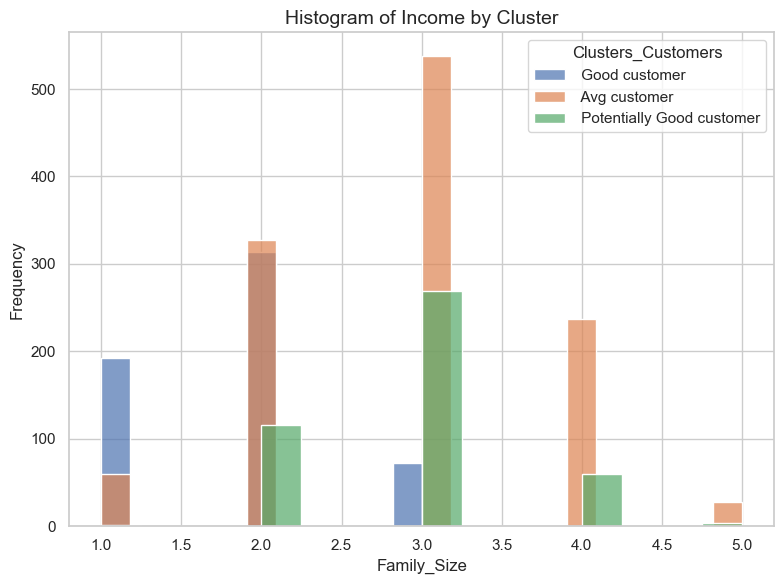

In [252]:
plot_cluster_histogram(df=dataframe,cluster_col='Clusters_Customers',col='Family_Size')

Family Size Analysis:

- Single-member families are prevalent in the Good customer segment, indicating a higher proportion compared to other segments.
- Families with two members show nearly equal frequency in both the Average and Good consumer segments, suggesting a balanced distribution.
- Three-member families have the highest frequency among Average consumers, although they have a relatively smaller proportion of Good consumers.
- Families with five members appear to be less across all segments.
- Four-member families exhibit a high frequency of Average consumers, but there is a negligible presence of Good segment consumers."

In [250]:
dataframe.columns

Index(['Education', 'Living_With', 'Income', 'Recency', 'Complain',
       'Total_Offsprings', 'Family_Size', 'Days_since_enrolment', 'Age',
       'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Total_Amount',
       'Total_purchases', 'NumDealsPurchases', 'Frequency',
       'Clusters_Customers'],
      dtype='object')

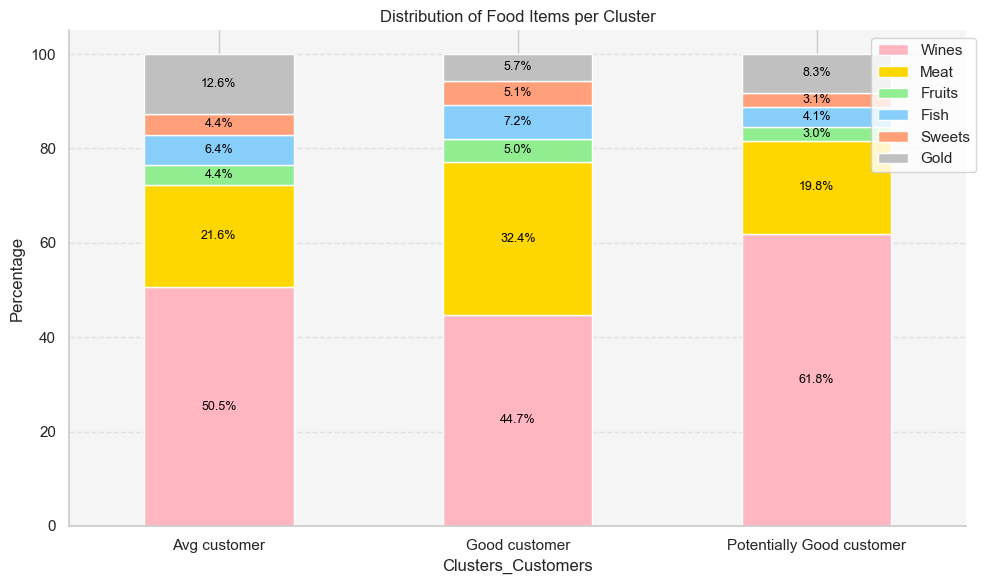

In [251]:


def food_distribution_per_cluster(dataframe, food_columns, cluster_column):
    # Group the data by the cluster column and calculate the sum of each food item
    grouped_data = dataframe.groupby(cluster_column)[food_columns].sum()

    # Calculate the percentages for each food item in each cluster
    total_per_cluster = grouped_data.sum(axis=1)
    distribution = grouped_data.divide(total_per_cluster, axis=0) * 100

    # Plot the distribution of food items for each cluster
    colors = ['#FFB6C1', '#FFD700', '#90EE90', '#87CEFA', '#FFA07A', '#C0C0C0']  # Custom colors for each food item
    ax = distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors, edgecolor='white')
    ax.set_xlabel(cluster_column)
    ax.set_ylabel('Percentage')
    ax.set_title('Distribution of Food Items per Cluster')
    ax.legend(loc='upper right')

    # Customize the x-axis tick labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

    # Add grid lines and set the background color
    ax.grid(True, axis='y', linestyle='--', alpha=0.5)
    ax.set_facecolor('#F5F5F5')  # Light gray background color

    # Adjust the legend position and format the legend text
    legend = ax.legend(loc='upper right', bbox_to_anchor=(1.02, 1))
    for text in legend.get_texts():
        text.set_fontsize('11')

    # Remove the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Add percentage labels inside the divisions
    for patch in ax.patches:
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_y() + patch.get_height() / 2
        percentage = f'{patch.get_height():.1f}%'
        ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=9, color='black')

    plt.tight_layout()  # Adjust spacing between subplots

    plt.show()
    
food_distribution_per_cluster(dataframe=dataframe,food_columns=['Wines', 'Meat','Fruits' , 'Fish', 'Sweets', 'Gold'],cluster_column='Clusters_Customers')

- Wines consumptioon is Comapritively high accorss all customer Segments
- Meat consumption is second highest consumed product